
###  Zbiór danych został pobrany z platformy Kaggle. Dane do zbioru zostały zebrane z rocznego badania Stack Overflow z roku 2020.
### Badanie dotyczy aspektów doświadczenia programisty, takich jak między innymi zadowolenie z pracy, poziom edukacji, kraj pochodzenia, ukończony kierunek studiów, liczba lat programowania jako profesjonaliści i wiele innych.
### Na potrzebę analizy skupię się tylko na wybranych kolumnach zbioru danych, mianowicie poddam analizie liczbę lat programowania jako profesjonalista, zadowolenie badanych z wykonywanej pracy, płeć oraz wiek badanych osób.



In [232]:
install.packages("ggthemes")
library('ggplot2')
library('dplyr')
install.packages("moments")
library(moments)


The downloaded binary packages are in
	/var/folders/vh/zh9_lgfj7c5frc_5b8rdpq9w0000gn/T//RtmpvQIa5n/downloaded_packages

The downloaded binary packages are in
	/var/folders/vh/zh9_lgfj7c5frc_5b8rdpq9w0000gn/T//RtmpvQIa5n/downloaded_packages


In [233]:
data_surv <- read.csv("file:///Users/Justina/Desktop/data_science/datasets/survey_results_public.csv")

head(data_surv)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,⋯,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,1,I am a developer by profession,Yes,NA,13,Monthly,NA,NA,Germany,European Euro,⋯,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or software engineering",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50,36,27
2,2,I am a developer by profession,No,NA,19,NA,NA,NA,United Kingdom,Pound sterling,⋯,NA,NA,NA,"Computer science, computer engineering, or software engineering",NA,NA,Somewhat more welcome now than last year,NA,7,4
3,3,I code primarily as a hobby,Yes,NA,15,NA,NA,NA,Russian Federation,NA,⋯,Neither easy nor difficult,Appropriate in length,NA,NA,NA,NA,Somewhat more welcome now than last year,NA,4,NA
4,4,I am a developer by profession,Yes,25,18,NA,NA,NA,Albania,Albanian lek,⋯,NA,NA,No,"Computer science, computer engineering, or software engineering",NA,NA,Somewhat less welcome now than last year,40,7,4
5,5,"I used to be a developer by profession, but no longer am",Yes,31,16,NA,NA,NA,United States,NA,⋯,Easy,Too short,No,"Computer science, computer engineering, or software engineering",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NA,15,8
6,6,I am a developer by profession,No,NA,14,NA,NA,NA,Germany,European Euro,⋯,Neither easy nor difficult,Appropriate in length,NA,NA,React.js,NA,NA,NA,6,4


### Wyczyszczę trochę dane, wydobędę kolumny, które mnie interesują i zmienię ich nazwy

In [234]:

data <- data_surv %>%
    select("Age","Gender","JobSat","YearsCodePro")

colnames(data) <- c("age","gender","job_satisfaction","years_of_programming_as_pro")

head(data)

data <- data[!is.na(data$years_of_programming_as_pro),]
data <- data[!is.na(data$job_satisfaction),]
data <- data[!is.na(data$gender),]
data_cleaned <- data[!is.na(data$age),]

data_cleaned['years_of_programming_as_pro'][data_cleaned['years_of_programming_as_pro'] == 'Less than 1 year'] <- 0
data_cleaned$years_of_programming_as_pro <- as.factor(as.character(data_cleaned$years_of_programming_as_pro))
data_cleaned$years_of_programming_as_pro <- as.numeric(as.factor(data_cleaned$years_of_programming_as_pro))

data_cleaned$age <- as.factor(as.character(data_cleaned$age))
data_cleaned$age <- as.numeric(as.factor(data_cleaned$age))

data_cleaned <- data_cleaned[!data_cleaned$age<=data_cleaned$years_of_programming_as_pro,]

data_cleaned



,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<chr>
1,NA,Man,Slightly satisfied,27
2,NA,NA,Very dissatisfied,4
3,NA,NA,NA,NA
4,25,Man,Slightly dissatisfied,4
5,31,Man,NA,8
6,NA,Man,Slightly satisfied,4


,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
8,35,Man,Slightly dissatisfied,6
11,14,Man,Slightly dissatisfied,13
13,53,Man,Very satisfied,14
14,22,Man,Slightly satisfied,2
16,44,Man,Very satisfied,17
18,30,Man,Very satisfied,5
20,39,Man,Neither satisfied nor dissatisfied,10
24,44,Man,Very satisfied,14
32,28,Man,Slightly satisfied,3


### Wyodrębniam dane badanych, gdzie zadowolenie z pracy jest największe, oraz najmniejsze.

In [235]:
highets_sat <- data_cleaned %>% filter(job_satisfaction == 'Very satisfied')
highets_sat

lowest_sat <- data_cleaned %>% filter(job_satisfaction == 'Very dissatisfied')
lowest_sat

age,gender,job_satisfaction,years_of_programming_as_pro
<dbl>,<chr>,<chr>,<dbl>
53,Man,Very satisfied,14
44,Man,Very satisfied,17
30,Man,Very satisfied,5
44,Man,Very satisfied,14
9,Man,Very satisfied,2
34,Man,Very satisfied,5
30,Man,Very satisfied,3
53,Man,Very satisfied,22
43,Man,Very satisfied,17


age,gender,job_satisfaction,years_of_programming_as_pro
<dbl>,<chr>,<chr>,<dbl>
26,Man,Very dissatisfied,13
63,Man,Very dissatisfied,30
32,Man,Very dissatisfied,5
28,Man,Very dissatisfied,13
30,Man,Very dissatisfied,3
51,Woman,Very dissatisfied,46
30,Man,Very dissatisfied,4
39,Woman,Very dissatisfied,2
56,Man,Very dissatisfied,25


### Zbadam jak prezentuje się liczba badanych zadowolonych bądź niezadowolonych z pracy, kiedy weźmiemy pod uwagę ich płeć.

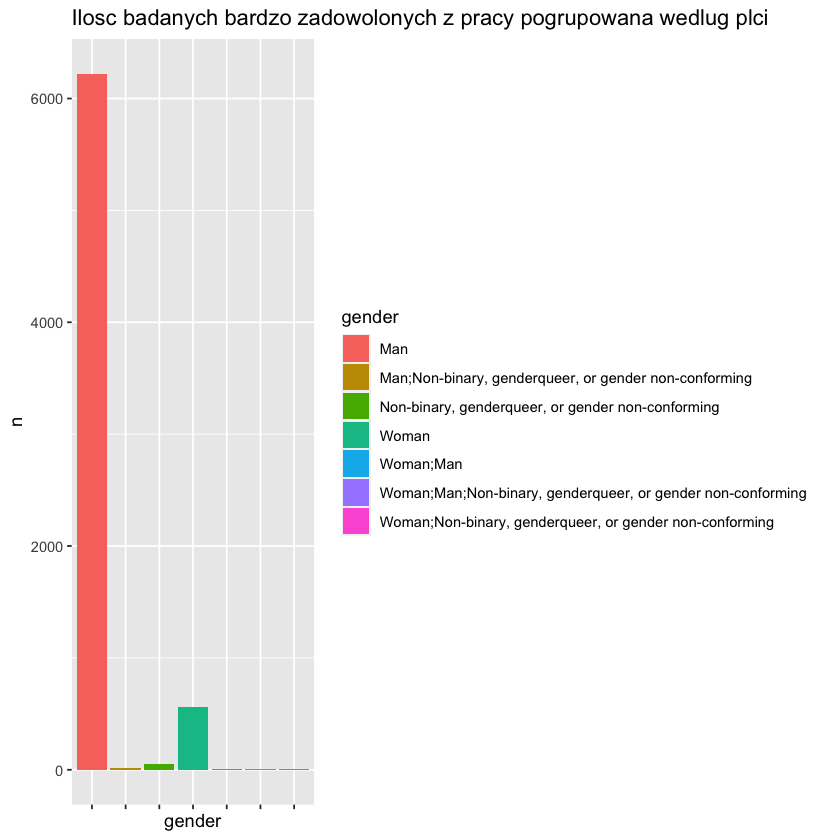

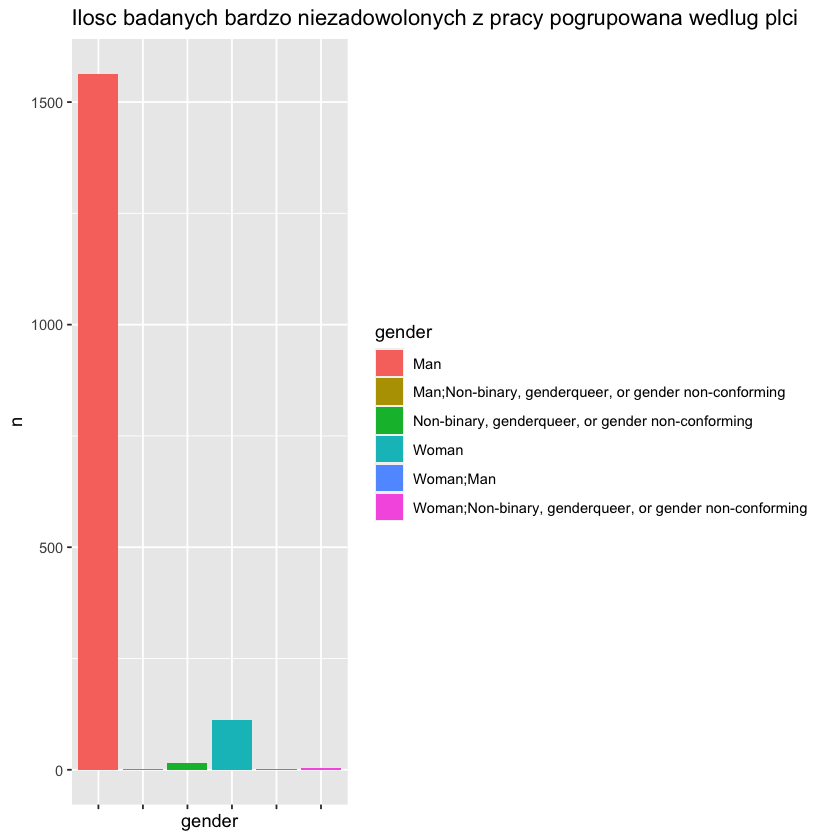

In [236]:

highest_sat_gender <- highets_sat %>% group_by(gender) %>% summarise(n=n())
ggplot(highest_sat_gender, aes(x=gender, y = n, fill=gender)) + geom_bar(stat="identity") + theme(axis.text.x = element_blank()) + ggtitle("Ilosc badanych bardzo zadowolonych z pracy pogrupowana wedlug plci")

lowest_sat_gender <- lowest_sat %>% group_by(gender) %>% summarise(n=n())
ggplot(lowest_sat_gender, aes(x=gender, y = n, fill=gender)) + geom_bar(stat="identity") + theme(axis.text.x = element_blank()) + ggtitle("Ilosc badanych bardzo niezadowolonych z pracy pogrupowana wedlug plci")


#### Dla obu grup najwięcej jest mężczyzn, następnie kobiet. Zbadam teraz jak prezentują się wstępne statystyki, kiedy wyodrębnię mężczyzn i kobiety.

In [237]:
highest_sat_women <- highets_sat %>% filter(gender == 'Woman')
head(highest_sat_women)
highest_sat_men <- highets_sat %>% filter(gender == 'Man')
head(highest_sat_men)

summary(highest_sat_women)
summary(highest_sat_men)

lowest_sat_women <- lowest_sat %>% filter(gender == 'Woman')
head(lowest_sat_women)
lowest_sat_men <- lowest_sat %>% filter(gender == 'Man')
head(lowest_sat_men)

summary(lowest_sat_women)
summary(lowest_sat_men)

,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,11,Woman,Very satisfied,2
2,25,Woman,Very satisfied,13
3,55,Woman,Very satisfied,19
4,26,Woman,Very satisfied,1
5,33,Woman,Very satisfied,14
6,39,Woman,Very satisfied,6


,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,53,Man,Very satisfied,14
2,44,Man,Very satisfied,17
3,30,Man,Very satisfied,5
4,44,Man,Very satisfied,14
5,9,Man,Very satisfied,2
6,34,Man,Very satisfied,5


      age          gender          job_satisfaction  
 Min.   : 6.0   Length:558         Length:558        
 1st Qu.:19.0   Class :character   Class :character  
 Median :30.0   Mode  :character   Mode  :character  
 Mean   :30.7                                        
 3rd Qu.:38.0                                        
 Max.   :72.0                                        
 years_of_programming_as_pro
 Min.   : 1.00              
 1st Qu.: 2.00              
 Median :10.50              
 Mean   :10.69              
 3rd Qu.:14.00              
 Max.   :51.00              

      age           gender          job_satisfaction  
 Min.   : 5.00   Length:6223        Length:6223       
 1st Qu.:26.00   Class :character   Class :character  
 Median :34.00   Mode  :character   Mode  :character  
 Mean   :33.75                                        
 3rd Qu.:41.00                                        
 Max.   :85.00                                        
 years_of_programming_as_pro
 Min.   : 1.00              
 1st Qu.: 3.00              
 Median : 9.00              
 Mean   :11.03              
 3rd Qu.:14.00              
 Max.   :52.00              

,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,51,Woman,Very dissatisfied,46
2,39,Woman,Very dissatisfied,2
3,19,Woman,Very dissatisfied,2
4,14,Woman,Very dissatisfied,2
5,26,Woman,Very dissatisfied,13
6,45,Woman,Very dissatisfied,19


,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,26,Man,Very dissatisfied,13
2,63,Man,Very dissatisfied,30
3,32,Man,Very dissatisfied,5
4,28,Man,Very dissatisfied,13
5,30,Man,Very dissatisfied,3
6,30,Man,Very dissatisfied,4


      age           gender          job_satisfaction  
 Min.   : 8.00   Length:112         Length:112        
 1st Qu.:22.00   Class :character   Class :character  
 Median :33.00   Mode  :character   Mode  :character  
 Mean   :31.68                                        
 3rd Qu.:40.25                                        
 Max.   :63.00                                        
 years_of_programming_as_pro
 Min.   : 1.00              
 1st Qu.: 3.00              
 Median :13.00              
 Mean   :11.30              
 3rd Qu.:15.25              
 Max.   :46.00              

      age           gender          job_satisfaction  
 Min.   : 7.00   Length:1564        Length:1564       
 1st Qu.:25.00   Class :character   Class :character  
 Median :34.00   Mode  :character   Mode  :character  
 Mean   :33.13                                        
 3rd Qu.:40.00                                        
 Max.   :83.00                                        
 years_of_programming_as_pro
 Min.   : 1.00              
 1st Qu.: 3.00              
 Median : 8.00              
 Mean   :10.48              
 3rd Qu.:14.00              
 Max.   :52.00              

#### Średni wiek kobiet jest mniejszy od średniego wieku mężczyzn zarówno dla zadowolonej grupy jak i niezadowolonej.
#### Zobaczę, jak powyższe dane prezentują się na histogramach:
#### 



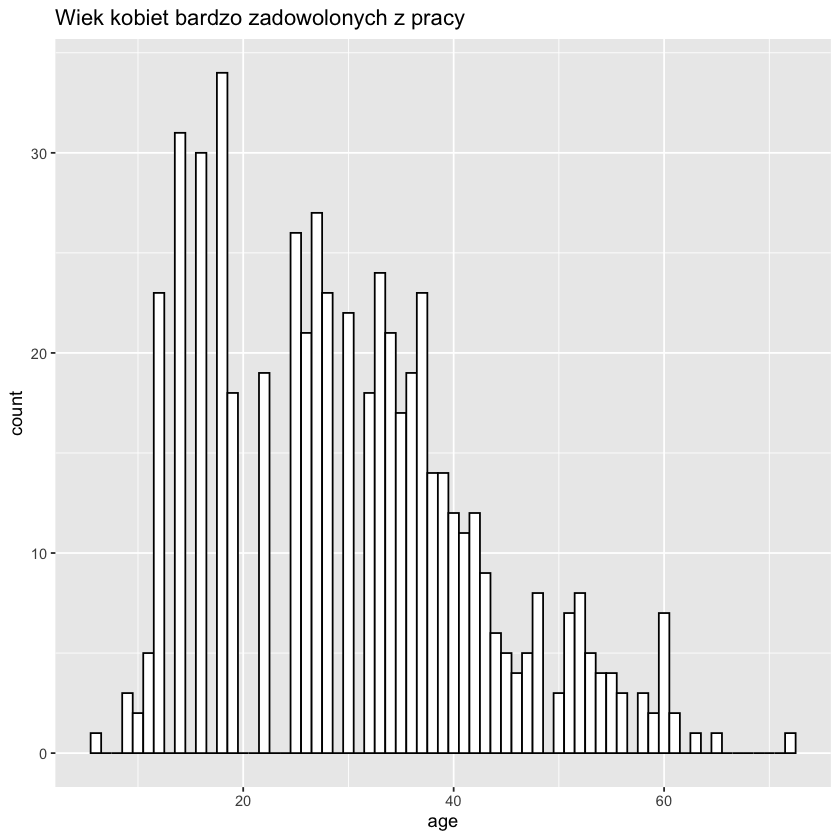

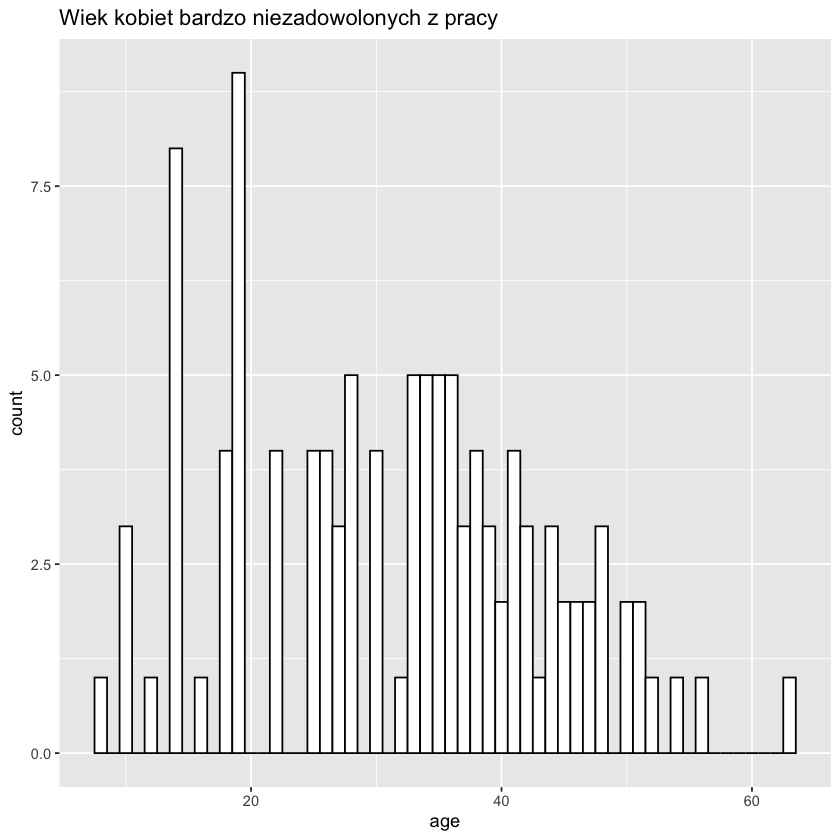

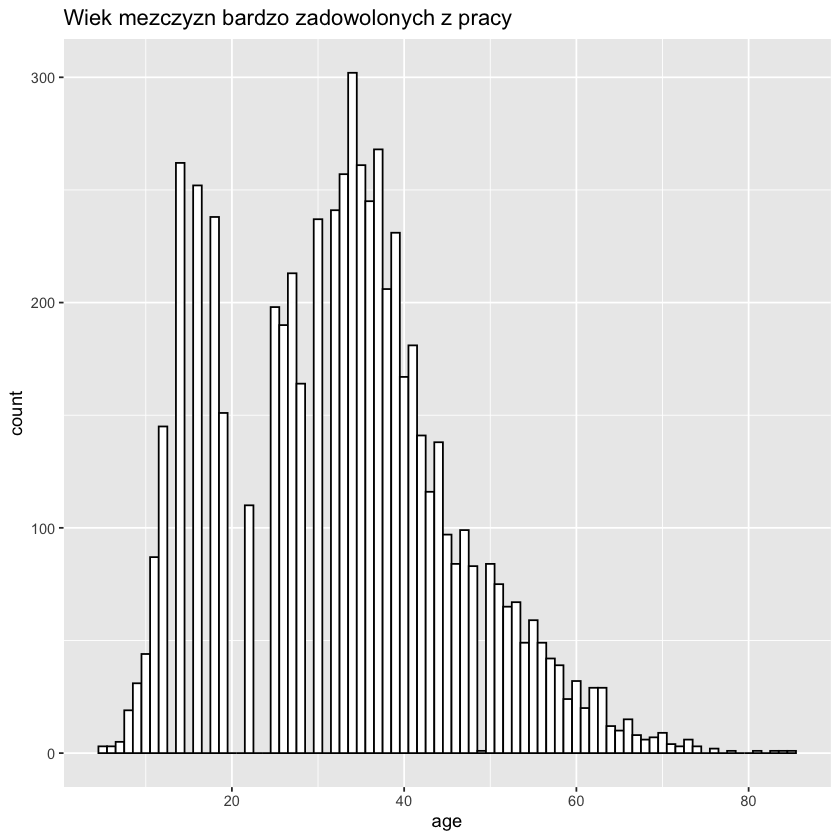

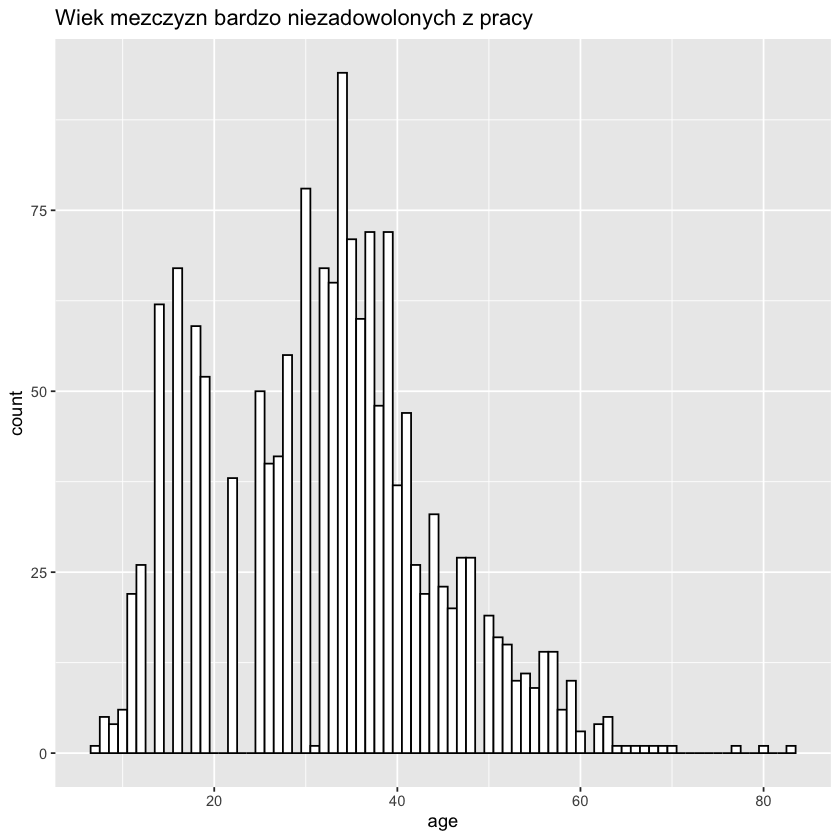

In [248]:

ggplot(highest_sat_women, aes(x=age)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Wiek kobiet bardzo zadowolonych z pracy")
ggplot(lowest_sat_women, aes(x=age)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Wiek kobiet bardzo niezadowolonych z pracy")


ggplot(highest_sat_men, aes(x=age)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Wiek mezczyzn bardzo zadowolonych z pracy")
ggplot(lowest_sat_men, aes(x=age)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Wiek mezczyzn bardzo niezadowolonych z pracy")


#### Dla powyższych danych obliczę miary tendencji centralnej:
#### 

In [249]:
x_med_high_w <- median(highest_sat_women$age)
x_med_high_w
x_avg_high_w <- mean(highest_sat_women$age)
x_avg_high_w
kurtoza_high_w <- kurtosis(highest_sat_women$age)
kurtoza_high_w
skośność_high_w <- skewness(highest_sat_women$age)
skośność_high_w


[1] 30

[1] 30.69713

[1] 2.654104

[1] 0.3928021

#### Średnia i mediana są prawie takie same, co prawie wskazuje na rozkład symetryczny.
#### Kurtoza wynosi mniej niż 3 co mówi nam o rozkładzie spłaszczonym.
#### Skośność jest dodatnia, co jest charakterystyczne dla rozkładu prawostronnie skośnego, ale wynosi tylko lekko powyżej 0, co już prawie wskazuje na rozkład symetryczny.

In [250]:
x_med_low_w <- median(lowest_sat_women$age)
x_med_low_w
x_avg_low_w <- mean(lowest_sat_women$age)
x_avg_low_w
kurtoza_low_w <- kurtosis(lowest_sat_women$age)
kurtoza_low_w
skośność_low_w <- skewness(lowest_sat_women$age)
skośność_low_w

[1] 33

[1] 31.67857

[1] 2.296494

[1] 0.0313983

#### Mediana jest większa od średniej (ale tylko trochę) co wskazuje na rozkład lewostronnie skośny.
#### Kurtoza wynosi mniej niż 3 co mówi nam o rozkładzie spłaszczonym.
#### Skośność wynosi lekko powyżej 0, co prawie wskazuje na rozkład symetryczny.
#### 

In [251]:
x_med_high_m <- median(highest_sat_men$age)
x_med_high_m
x_avg_high_m <- mean(highest_sat_men$age)
x_avg_high_m
kurtoza_high_m <- kurtosis(highest_sat_men$age)
kurtoza_high_m
skośność_high_m <- skewness(highest_sat_men$age)
skośność_high_m

[1] 34

[1] 33.75141

[1] 2.868271

[1] 0.20346

#### Mediana jest większa od średniej (ale tylko trochę) co wskazuje na rozkład lewostronnie skośny.
#### Kurtoza wynosi mniej niż 3 co mówi nam o rozkładzie spłaszczonym.
#### Skośność wynosi lekko powyżej 0, co prawie wskazuje na rozkład symetryczny.
#### 

In [252]:
x_med_low_m <- median(lowest_sat_men$age)
x_med_low_m
x_avg_low_m <- mean(lowest_sat_men$age)
x_avg_low_m
kurtoza_low_m <- kurtosis(lowest_sat_men$age)
kurtoza_low_m
skośność_low_m <- skewness(lowest_sat_men$age)
skośność_low_m

[1] 34

[1] 33.12724

[1] 3.0073

[1] 0.1803095

#### Mediana jest większa od średniej (ale tylko trochę) co wskazuje na rozkład lewostronnie skośny.
#### Kurtoza w przybliżeniu wynosi 3 co mówi nam o rozkładzie prawie normalnym.
#### Skośność wynosi lekko powyżej 0, co prawie wskazuje na rozkład symetryczny. 
#### 

### Analiza liczby lat programowania jako profesjonaliści wszystkich badanych

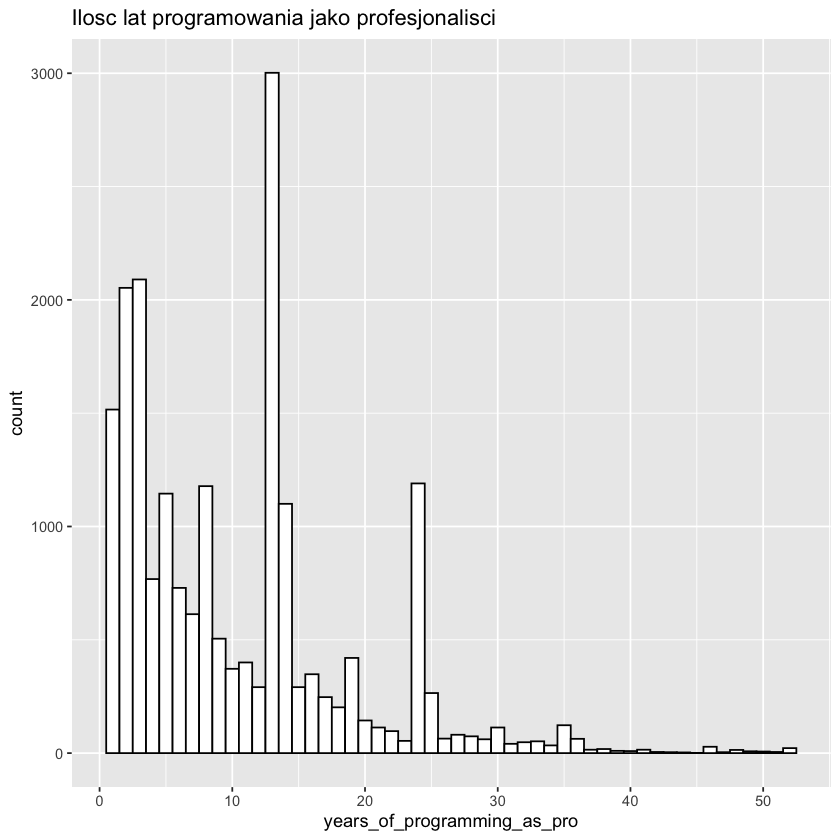

In [253]:

ggplot(data_cleaned, aes(x=years_of_programming_as_pro)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Ilosc lat programowania jako profesjonalisci")

#### Dla powyższych danych obliczam miary tenderncji centralnej:
#### 

In [254]:
x_med <- median(data_cleaned$years_of_programming_as_pro)
x_med
x_avg <- mean(data_cleaned$years_of_programming_as_pro)
x_avg

[1] 8

[1] 10.45669

#### Mediana jest mniejsza niż średnia, co potwierdza (jak też pokazuje powyższy histogram), że rozkład jest prawostronnie skośny.


In [255]:
kurtoza <- kurtosis(data_cleaned$years_of_programming_as_pro)
kurtoza

[1] 4.818759

#### Kurtoza wyniosła powyżej 3, co wskazuje na rozkład wyostrzony. 

#### Wysoka kurtoza mówi nam, że więcej wariancji wynika z rzadkich, ekstremalnych obserwacji niż z częstych odchyleń małej wielkości. Tak więc powyższa kurtoza może wskazywać na to, że mamy dużo odstających obserwacji, które są bardziej ekstremalne, na co mogą również wskazywać pojedyncze piki na powyższym histogramie.
#### 



In [256]:
skośność <- skewness(data_cleaned$years_of_programming_as_pro)
skośność

[1] 1.224777

#### Dla rozkładu prawostronnie skośnego skośność powinna wyjść dodatnia i taka też jest.

### Zbadam teraz korelację między latami programowania jako profesjonaliści, a wiekiem badanych.

,age
years_of_programming_as_pro,0.5229975


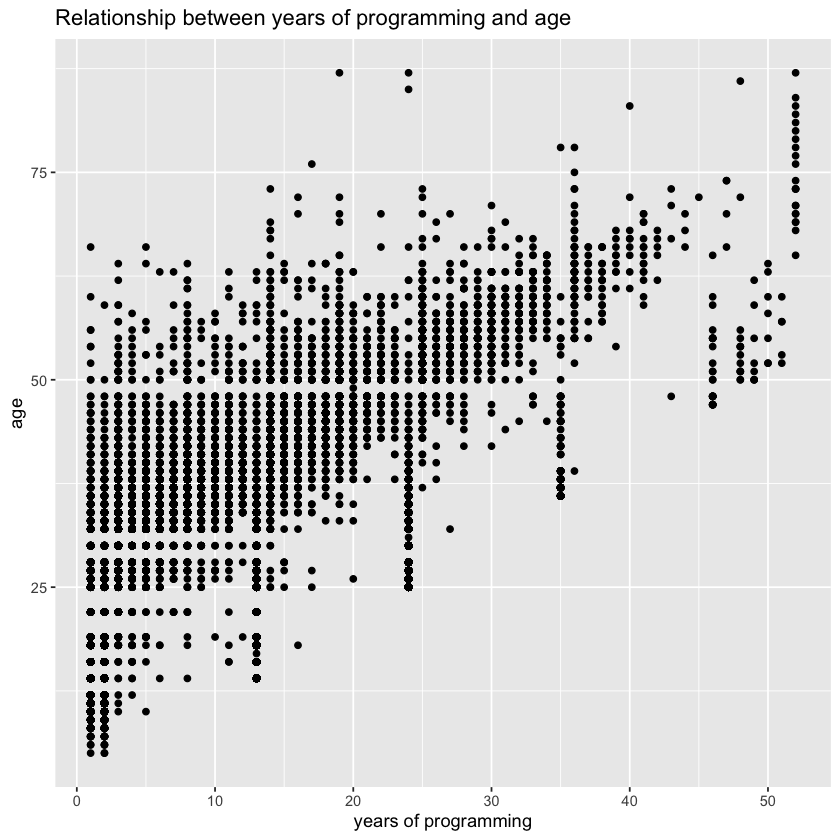

In [257]:
ggplot(data_cleaned, aes(x=years_of_programming_as_pro, y=age))+geom_point()+ggtitle("Relationship between years of programming and age")+ xlab("years of programming")+ ylab("age")

x <- as.vector(data_cleaned['years_of_programming_as_pro'])
y <- as.vector(data_cleaned['age'])
corr <- cor(x,y,method = "pearson")
corr

#### Koleracja podniesiona do kwadratu wynosi 0.25 i jest wskaźnikiem słabego związku liniowego między zmiennymi.

### Zastosuję teraz regresje liniową dodając linię do powyższego wykresu

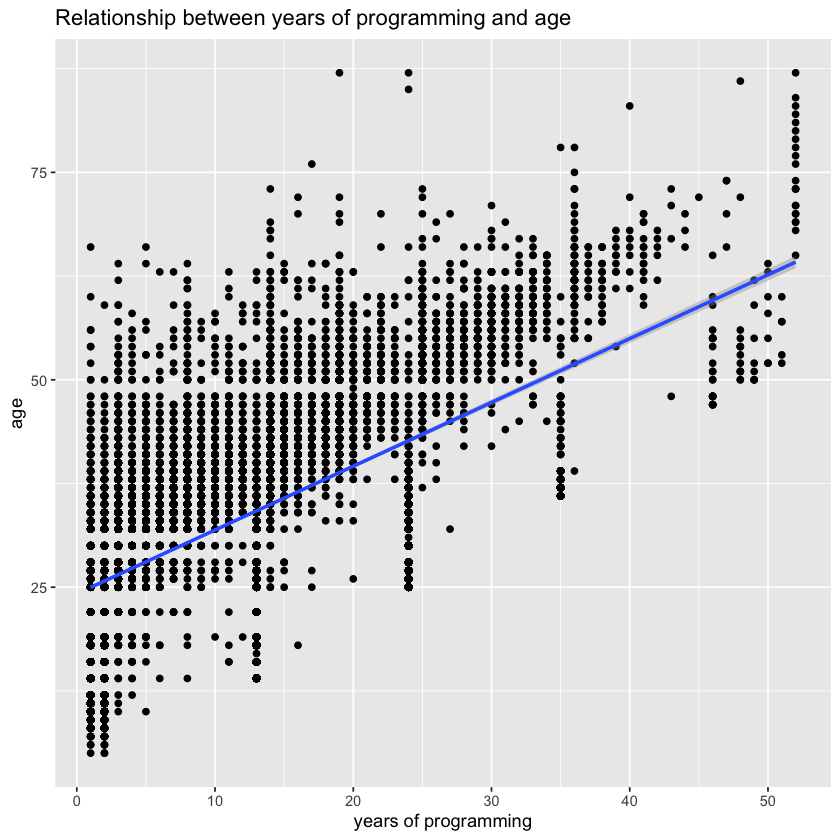

In [258]:
ggplot(data_cleaned, aes(x=years_of_programming_as_pro, y=age))+geom_point()+ggtitle("Relationship between years of programming and age")+ xlab("years of programming")+ ylab("age") + geom_smooth(method='lm',formula= y~x) 



#### Jak widać z wykresu wariancja jest zależna od wartości x, także dane są heteroskedastyczne. Wykres nie jest również linowy. 
#### Także nie możemy zastosować modelu regresji w tej sytuacji. Wskazywała na to również obliczona wcześniej wartość korelacji, ktora wskazywała na słaby związek między badanymi zmiennymi, a mianowicie, że regresja liniowa wyjaśni tylko 25% wariancji.


### Analiza liczby lat programowania jako profesjonaliści dla dwóch populacji - jednej gdzie badani są bardzo zadowoleni z pracy i drugiej gdzie są bardzo niezadowoleni. 

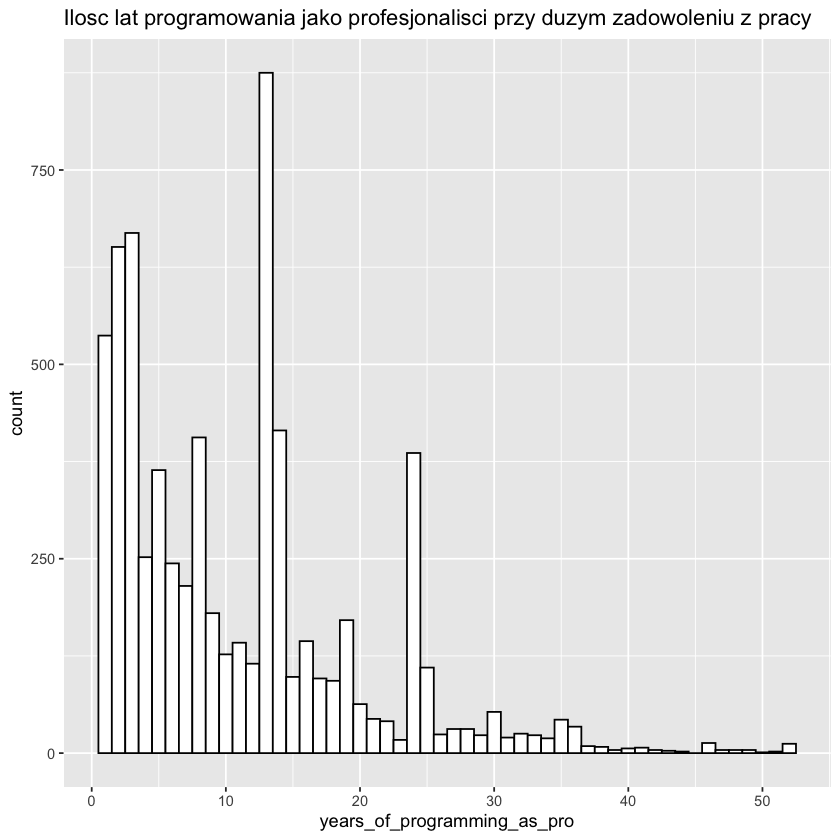

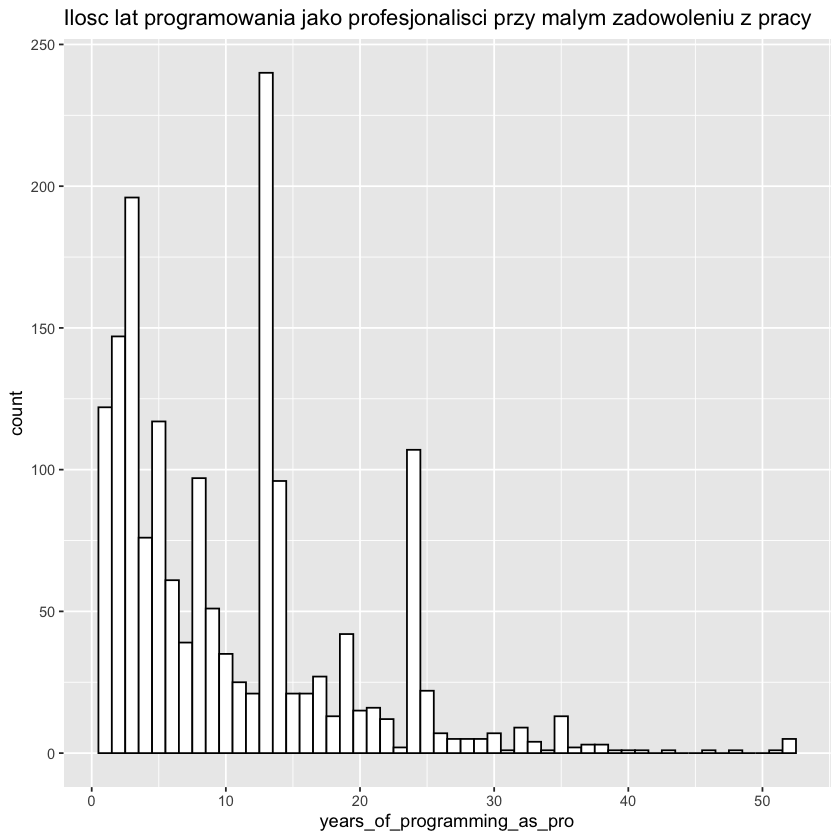

In [259]:

ggplot(highets_sat, aes(x=years_of_programming_as_pro)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Ilosc lat programowania jako profesjonalisci przy duzym zadowoleniu z pracy")
ggplot(lowest_sat, aes(x=years_of_programming_as_pro)) + geom_histogram(color="black",fill="white",binwidth=1) + ggtitle("Ilosc lat programowania jako profesjonalisci przy malym zadowoleniu z pracy")


In [260]:
x_med1<- median(highets_sat$years_of_programming_as_pro)
x_med1
x_avg1 <- mean(highets_sat$years_of_programming_as_pro)
x_avg1

x_med2 <- median(lowest_sat$years_of_programming_as_pro)
x_med2
x_avg2 <- mean(lowest_sat$years_of_programming_as_pro)
x_avg2

[1] 9

[1] 11.00277

[1] 8

[1] 10.56007

#### Dla obu populacji średnia jest większa niż mediana, co wskazuje na rozkład prawostronnie skośny.

In [261]:
kurtoza1 <- kurtosis(highets_sat$years_of_programming_as_pro)
kurtoza1
skosnosc1 <- skewness(highets_sat$years_of_programming_as_pro)
skosnosc1

kurtoza2 <- kurtosis(lowest_sat$years_of_programming_as_pro)
kurtoza2
skosnosc2 <- skewness(lowest_sat$years_of_programming_as_pro)
skosnosc2

[1] 4.660775

[1] 1.209963

[1] 5.067243

[1] 1.271095

#### Dla obu populacji kurtoza wynosi powyżej 3, co wskazuje na rozkład wyostrzony i tak jak wcześniej, obecność obserwacji odstających.
#### Skośność dla obu grup jest dodatnia, co jest zgodne z rozkładem prawostronnie skośnym.

### Ponieważ w obu grupach danych jest bardzo dużo, pobiorę z obu 500-elementowe losowe próbki.

In [262]:
highets_sat2 <- sample_n(highets_sat, 500)
highets_sat2
lowest_sat2 <- sample_n(lowest_sat, 500)
lowest_sat2

age,gender,job_satisfaction,years_of_programming_as_pro
<dbl>,<chr>,<chr>,<dbl>
28,Man,Very satisfied,2
36,Man,Very satisfied,7
28,Man,Very satisfied,1
35,Man,Very satisfied,3
62,Man,Very satisfied,25
14,Man,Very satisfied,13
50,Man,Very satisfied,16
19,Man,Very satisfied,13
12,Man,Very satisfied,2


age,gender,job_satisfaction,years_of_programming_as_pro
<dbl>,<chr>,<chr>,<dbl>
50,Man,Very dissatisfied,20
8,Man,Very dissatisfied,2
26,Man,Very dissatisfied,13
28,Man,Very dissatisfied,3
25,Man,Very dissatisfied,13
40,Man,Very dissatisfied,8
38,Man,Very dissatisfied,12
41,Man,Very dissatisfied,14
32,Man,Very dissatisfied,5


### Obliczam średnią liczbę lat programowania i estymuję wariancję dla powyższych grup

In [263]:
x1 <- mean(highets_sat2$years_of_programming_as_pro)
s1 <- var(highets_sat2$years_of_programming_as_pro)
n1 <- length(highets_sat2$years_of_programming_as_pro)

x1
s1
n1

x2 <- mean(lowest_sat2$years_of_programming_as_pro)
s2 <- var(lowest_sat2$years_of_programming_as_pro)
n2 <- length(lowest_sat2$years_of_programming_as_pro)

x2
s2
n2

[1] 11.28

[1] 82.75912

[1] 500

[1] 9.908

[1] 68.09573

[1] 500

### Za pomocą testu niesparowanego Z dla dwóch populacji zbadam, czy średnia liczba lat programowania jako profesjonalista przy dużym zadowoleniu z pracy jest większa niż przy małym zadowoleniu.
#### Obie próby są dostatecznie duże kierując się heurystyką statystyków-optymistów (n1>30, n2>30), także mogę założyć, że średnie arytmetyczne z próby są zmiennymi losowymi o rozkładzie normalnym.
#### H0: mi1 - mi2 = 0
#### H1: mi1 - mi2 > 0


In [264]:
Z <- (x1 - x2)/(sqrt(((s1^2)/n1) + ((s2^2)/n2)))
(Z)

[1] 0.2862548

#### Dla poziomu istotności alpha = 5% przedział krytyczny dla testu prawostronnego wynosi:

In [265]:
qnorm(0.05)

[1] -1.644854

#### (1.65;inf)

#### Z-wartość nie zawiera się w zbiorze krytycznym, zatem nie ma podstaw do odrzucenia hipotezy zerowej.

#### Dla testu dwustronnego wniosek byłby taki sam, ponieważ wartość-Z również nie zawierałaby się w zbiorze krytycznym, który wynosiłby:
#### (-inf; -1.96)U(1.96;inf)

#### Tym samym średnia liczba lat programowania jako profesjonalista przy dużym zadowoleniu z pracy może być taka sama jak przy małym zadowoleniu.
#### Jest to ciekawe spostrzeżenie, które pokazuje, że ludziom może się nie podobać ich praca, a i tak ją wykonują.

#### Dla prawdziwych populacji w badaniu średnia liczba lat programowania jako profesjonaliści przy dużym zadowoleniu z pracy wynosiła 9, a przy małym zadowoleniu wynosiła 8. W przeprowadzonym teście wyszło nam, że średnia liczba tych lat może być taka sama. Popełniono więc błąd drugiego rodzaju, gdzie przyjęliśmy hipotezę zerową, kiedy ta była fałszywa.

### Zbadam teraz, czy średnia liczba lat programowania jako profesjonaliści dla kobiet, kiedy są bardzo niezadowolone z pracy, jest większa niż dla mężczyzn, kiedy są bardzo niezadowoleni z pracy.

#### Skorzystam z wcześniej wyodrębnionych danych w data frame'ie "lowest_sat_women" oraz "lowest_sat_men".
#### Pobiorę próbę 100 osób z obu populacji:
#### 

In [266]:
low_sat_women <- sample_n(lowest_sat_women, 100)
head(low_sat_women)
low_sat_men <- sample_n(lowest_sat_men, 100)
head(low_sat_men)

,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,18,Woman,Very dissatisfied,13
2,33,Woman,Very dissatisfied,24
3,30,Woman,Very dissatisfied,3
4,14,Woman,Very dissatisfied,13
5,19,Woman,Very dissatisfied,13
6,14,Woman,Very dissatisfied,2


,age,gender,job_satisfaction,years_of_programming_as_pro
,<dbl>,<chr>,<chr>,<dbl>
1,41,Man,Very dissatisfied,14
2,42,Man,Very dissatisfied,10
3,57,Man,Very dissatisfied,19
4,28,Man,Very dissatisfied,3
5,40,Man,Very dissatisfied,3
6,26,Man,Very dissatisfied,24


#### Obliczam średnią liczbę lat programowania i estymuję wariancję dla powyższych grup, oraz estymuję wariancję:
#### 

In [267]:
x_w <- mean(low_sat_women$years_of_programming_as_pro)
s_w <- var(low_sat_women$years_of_programming_as_pro)
n_w <- length(low_sat_women$years_of_programming_as_pro)

x_w
s_w
n_w

x_m <- mean(low_sat_men$years_of_programming_as_pro)
s_m <- var(low_sat_men$years_of_programming_as_pro)
n_m <- length(low_sat_men$years_of_programming_as_pro)

x_m
s_m
n_m

[1] 11.4

[1] 87.27273

[1] 100

[1] 11.11

[1] 88.1797

[1] 100

#### Do badania użyję niesparowanego testu Z.

#### H0: m1 - m2 = 0
#### H1: m1 - m2 > 0
#### 


In [268]:
Z <- (x_w- x_m)/(sqrt(((s_w^2)/n_w) + ((s_m^2)/n_m)))
(Z)

[1] 0.0233748

#### Dla poziomu istotności alpha = 5% przedział krytyczny dla testu prawostronnego wynosi:

In [269]:
qnorm(0.05)

[1] -1.644854

#### (1.65;inf)

#### Otrzymana Z-wartość nie zawiera się w zbiorze krytycznym, zatem nie ma podstaw do odrzucenia hipotezy zerowej.
#### Tym samym średnia liczba lat programowania jako profesjonaliści dla kobiet, kiedy są bardzo niezadowolone z pracy może być taka sama jak dla mężczyzn.


#### Poniżej przedstawiam średnie otrzymane dla obu populacji:
#### 

In [270]:
mean(lowest_sat_women$years_of_programming_as_pro)
mean(lowest_sat_men$years_of_programming_as_pro)


[1] 11.30357

[1] 10.47506

#### Dla prawdziwych populacji w badaniu średnia liczba lat programowania jako profesjonaliści przy małym zadowoleniu z pracy dla kobiet wynosiła w przybliżeniu 11, a dla mężczyzn 10. 
#### W przeprowadzonym teście wyszło nam, że średnia liczba tych lat może być taka sama. Popełniono więc błąd drugiego rodzaju, gdzie nie odrzuciliśmy hipotezy zerowej, kiedy ta była fałszywa.